In [32]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb

In [47]:
dados = pd.read_csv(r"D:\pythonjobs\classificacao\churn-bigml-20.csv")

In [48]:
dados

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,WI,114,415,No,Yes,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,False
663,AL,106,408,No,Yes,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1,False
664,VT,60,415,No,No,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3,False
665,WV,159,415,No,No,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False


In [35]:
dados['Churn'] = dados['Churn'].apply(lambda x: 1 if x else 0)


In [36]:
dados['International plan'] = dados['International plan'].apply(lambda x: 1 if x == 'Yes' else 0)


In [37]:
dados['Voice mail plan'] = dados['Voice mail plan'].apply(lambda x: 1 if x == 'Yes' else 0)


In [38]:
dados = dados.drop('State', axis=1)


In [ ]:
#Dividindo variaveis

In [39]:
X = dados.drop('Churn', axis=1)
y = dados['Churn']

In [ ]:
#Treinando X e Y

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [41]:
X_train

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
234,55,510,0,0,0,189.0,100,32.13,118.5,99,10.07,248.1,87,11.16,17.1,6,4.62,0
398,100,408,0,0,0,70.8,94,12.04,215.6,102,18.33,230.8,125,10.39,9.5,1,2.57,6
278,66,408,0,0,0,87.6,76,14.89,262.0,111,22.27,184.6,125,8.31,9.2,5,2.48,1
61,121,408,0,0,0,170.4,108,28.97,350.5,68,29.79,297.0,87,13.37,11.2,3,3.02,0
145,176,415,0,0,0,223.2,76,37.94,214.4,131,18.22,154.4,80,6.95,10.1,2,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,54,510,0,0,0,210.5,102,35.79,204.5,83,17.38,127.8,53,5.75,8.5,5,2.30,1
106,150,415,0,1,29,209.9,77,35.68,158.0,52,13.43,141.9,113,6.39,6.6,1,1.78,0
270,90,415,0,0,0,76.1,121,12.94,290.3,73,24.68,236.9,89,10.66,10.8,3,2.92,0
435,104,510,0,0,0,97.2,88,16.52,155.6,85,13.23,261.6,105,11.77,12.4,5,3.35,0


In [49]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'binary:logistic',
    'max_depth': 3,
    'learning_rate': 0.1,
    'eval_metric': 'logloss'
}


num_rounds = 100
model = xgb.train(params, dtrain, num_rounds)

# Fazer previsões no conjunto de teste
y_pred_proba = model.predict(dtest)
y_pred_binary = np.round(y_pred_proba)

# Avaliar a precisão do modelo
accuracy = accuracy_score(y_test, y_pred_binary)
print(f'Acurácia do modelo: {accuracy}')

Acurácia do modelo: 0.9701492537313433


In [50]:
X_test_with_predictions = X_test.copy()
X_test_with_predictions['Predicted Churn'] = y_pred_binary

In [44]:
print(X_test_with_predictions.head())


     Account length  Area code  International plan  Voice mail plan  \
660             114        408                   0                0   
158             151        415                   0                1   
634             142        510                   0                1   
235             130        415                   0                0   
635             105        408                   0                0   

     Number vmail messages  Total day minutes  Total day calls  \
660                      0              203.8               85   
158                     26              196.5               98   
634                     40              230.7              101   
235                      0              155.9               95   
635                      0              232.6               96   

     Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
660             34.65               87.8              110              7.46   
158             33

In [51]:
X_test_with_predictions['Real Churn'] = y_test
#Exibe o Real e o previsto
print(X_test_with_predictions[['Real Churn', 'Predicted Churn']].head(40))


     Real Churn  Predicted Churn
660           0              0.0
158           0              0.0
634           0              0.0
235           0              0.0
635           0              0.0
361           0              0.0
390           1              0.0
446           0              0.0
554           0              0.0
90            0              0.0
81            0              0.0
284           0              0.0
353           0              0.0
220           0              0.0
210           0              0.0
63            0              0.0
54            0              0.0
462           0              0.0
213           0              0.0
155           1              1.0
109           1              1.0
507           0              0.0
436           0              0.0
473           0              0.0
538           0              0.0
637           0              0.0
333           0              0.0
338           0              0.0
302           0              0.0
76        

In [52]:
from sklearn.metrics import confusion_matrix, accuracy_score


In [53]:
conf_matrix = confusion_matrix(y_test, y_pred_binary)


In [54]:
conf_matrix

array([[118,   1],
       [  3,  12]], dtype=int64)

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Matriz de confusao

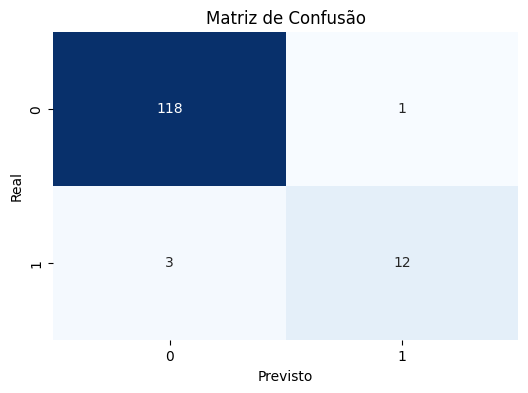

In [56]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusão')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()